# MATH 210 Introduction to Mathematical Computing

## April 4, 2016

Today's Agenda:

1. Example: Vancouver Street Trees Dataset
2. Data Wrangling: concatenating DataFrames with `.concat()` and applying a function elementwise on a column using `.map()`
3. More Plots

In [1]:
import pandas as pd
%matplotlib inline

## 1. Example: Vancouver Street Tree Dataset

The City of Vancouver [Open Data Catalogue](http://vancouver.ca/your-government/open-data-catalogue.aspx) is a wonderful resource of open data. Go to the [Street Trees dataset](http://data.vancouver.ca/datacatalogue/streetTrees.htm) and download the `.zip` file containing `.csv` files.

When you unzip the contents, you will see 22 `.csv` files containing data about street trees in each neighborhood. The goal of this notebook is build a DataFrame containing the data from several neighbourhoods and analyze it.

## 2. Data Wrangling

Data wrangling is the process of cleaning and manipulating data prior to analysis. Let's choose 5 `.csv` files of the  22 files available and put them together. In particular, let's look at the following neighbourhoods:

* StreetTrees_WestPointGrey.csv
* StreetTrees_WestEnd.csv
* StreetTrees_ArbutusRidge.csv
* StreetTrees_Downtown.csv
* StreetTrees_Kitsilano.csv

Let's try importing `WestPointGrey.csv`:

In [2]:
df = pd.read_csv('StreetTrees_WestPointGrey.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 4: invalid start byte

We get an error! It seems the data is using a different encoding in the data and there are some characters that pandas can't read by default. Let's specify the option `encoding='latin'`. This usually works.

In [3]:
df = pd.read_csv('StreetTrees_WestPointGrey.csv',encoding='latin')

It works! Let's look at the data:

In [4]:
df.head()

,TREE_ID,CIVIC_NUMBER,STD_STREET,NEIGHBOURHOOD_NAME,CELL,ON_STREET,ON_STREET_BLOCK,STREET_SIDE_NAME,ASSIGNED,HEIGHT_RANGE_ID,DIAMETER,DATE_PLANTED,PLANT_AREA,ROOT_BARRIER,CURB,CULTIVAR_NAME,GENUS_NAME,SPECIES_NAME,COMMON_NAME
0,589,4694,W 8TH AV,WEST POINT GREY,12,BLANCA ST,2400,EVEN,N,5,32,NaN,B,N,Y,,ALNUS,RUGOSA,SPECKLED ALDER
1,2180,4786,W 2ND AV,WEST POINT GREY,6,W 2ND AV,4700,EVEN,N,2,7,NaN,N,N,N,,RHUS,TYPHINA,STAGHORN SUMAC
2,1909,3707,W 2ND AV,WEST POINT GREY,2,W 2ND AV,3700,ODD,N,4,24,NaN,10,N,Y,,BETULA,NIGRA,RIVER BIRCH
3,1910,3707,W 2ND AV,WEST POINT GREY,5,W 2ND AV,3700,ODD,N,5,22,NaN,10,N,Y,,BETULA,NIGRA,RIVER BIRCH
4,1915,3708,W 2ND AV,WEST POINT GREY,23,ALMA ST,1800,ODD,N,3,16,NaN,6,N,Y,ATROPURPUREUM,PRUNUS,CERASIFERA,PISSARD PLUM


### Concatenating DataFrames

Now that we know what we're dealing with, we can import all the other files we want to analyse and we'll put them in one DataFrame using `.concat`.

In [5]:
WestPointGrey = pd.read_csv('StreetTrees_WestPointGrey.csv',encoding='latin')
WestEnd = pd.read_csv('StreetTrees_WestEnd.csv',encoding='latin')
ArbutusRidge = pd.read_csv('StreetTrees_ArbutusRidge.csv',encoding='latin')
Downtown = pd.read_csv('StreetTrees_Downtown.csv',encoding='latin')
Kitsilano = pd.read_csv('StreetTrees_Kitsilano.csv',encoding='latin')

trees = pd.concat([WestPointGrey,WestEnd,ArbutusRidge,Kitsilano,Downtown])

Let's see what we have!

In [6]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26438 entries, 0 to 5021
Data columns (total 19 columns):
TREE_ID               26438 non-null int64
CIVIC_NUMBER          26438 non-null int64
STD_STREET            26438 non-null object
NEIGHBOURHOOD_NAME    26438 non-null object
CELL                  26438 non-null int64
ON_STREET             26438 non-null object
ON_STREET_BLOCK       26438 non-null int64
STREET_SIDE_NAME      26438 non-null object
ASSIGNED              26438 non-null object
HEIGHT_RANGE_ID       26438 non-null int64
DIAMETER              26438 non-null float64
DATE_PLANTED          9693 non-null float64
PLANT_AREA            26392 non-null object
ROOT_BARRIER          26438 non-null object
CURB                  26438 non-null object
CULTIVAR_NAME         26438 non-null object
GENUS_NAME            26438 non-null object
SPECIES_NAME          26438 non-null object
COMMON_NAME           26438 non-null object
dtypes: float64(2), int64(5), object(12)
memory usage: 4.0+ 

In [8]:
trees['NEIGHBOURHOOD_NAME'].unique()

array(['WEST POINT GREY', 'WEST END', 'ARBUTUS RIDGE', 'KITSILANO',
       'DOWNTOWN'], dtype=object)

We have 26438 records with 19 columns for trees in 5 neighbourhoods!

### Computing values with `.map`

Notice that the `DATE_PLANTED` column consists of float values (and null values `NaN`). Let's select the non-null entries to take a look.

In [10]:
trees[trees['DATE_PLANTED'].notnull()].head()

,TREE_ID,CIVIC_NUMBER,STD_STREET,NEIGHBOURHOOD_NAME,CELL,ON_STREET,ON_STREET_BLOCK,STREET_SIDE_NAME,ASSIGNED,HEIGHT_RANGE_ID,DIAMETER,DATE_PLANTED,PLANT_AREA,ROOT_BARRIER,CURB,CULTIVAR_NAME,GENUS_NAME,SPECIES_NAME,COMMON_NAME
25,892,4593,W 11TH AV,WEST POINT GREY,22,TOLMIE ST,2600,EVEN,N,1,3.00,20081216,8,Y,N,GLOBOSUM,ACER,PLATANOIDES,GLOBEHEAD NORWAY MAPLE
31,2120,4727,W 2ND AV,WEST POINT GREY,3,W 2ND AV,4700,ODD,N,0,5.25,20020212,N,N,Y,AKEBONO,PRUNUS,X YEDOENSIS,AKEBONO FLOWERING CHERRY
34,2140,4755,W 2ND AV,WEST POINT GREY,1,W 2ND AV,4700,ODD,N,1,3.00,20020213,10,N,Y,AKEBONO,PRUNUS,X YEDOENSIS,AKEBONO FLOWERING CHERRY
35,2141,4755,W 2ND AV,WEST POINT GREY,4,W 2ND AV,4700,ODD,N,1,3.00,20000213,10,N,Y,AKEBONO,PRUNUS,X YEDOENSIS,AKEBONO FLOWERING CHERRY
36,2142,4755,W 2ND AV,WEST POINT GREY,6,W 2ND AV,4700,ODD,N,2,10.00,20020213,10,N,Y,AKEBONO,PRUNUS,X YEDOENSIS,AKEBONO FLOWERING CHERRY


The dates are 8 digit numbers in the form YYYYMMDD! Let's construct a new column `YEAR_PLANTED` by using the `.map` method with our own function which pick out the year from the 8 digit number.

First, let's make a function which picks out the year from the `DATE_PLANTED` column.

In [28]:
def year(n):
    "Return the first 4 digits of n (or NaN if n is null)."
    return n // 10000

In [29]:
year(20080816)

2008

In [43]:
year(trees.iloc[0,11])

-9223372036854775808

We can add a new column to our DataFrame and fill it with the year the tree was planted.

In [32]:
trees['YEAR_PLANTED'] = trees['DATE_PLANTED'].map(year)

In [37]:
trees[trees['YEAR_PLANTED'] == 2013].head()

,TREE_ID,CIVIC_NUMBER,STD_STREET,NEIGHBOURHOOD_NAME,CELL,ON_STREET,ON_STREET_BLOCK,STREET_SIDE_NAME,ASSIGNED,HEIGHT_RANGE_ID,DIAMETER,DATE_PLANTED,PLANT_AREA,ROOT_BARRIER,CURB,CULTIVAR_NAME,GENUS_NAME,SPECIES_NAME,COMMON_NAME,YEAR_PLANTED
1507,11505,1953,BLANCA ST,WEST POINT GREY,1,BLANCA ST,1900,ODD,N,1,3,20130108,12,N,N,SATOMI,CORNUS,KOUSA,PINK KOUSA DOGWOOD,2013
1611,16483,1953,BLANCA ST,WEST POINT GREY,5,BLANCA ST,1900,ODD,N,1,3,20130107,12,N,N,SATOMI,CORNUS,KOUSA,PINK KOUSA DOGWOOD,2013
1612,16497,4497,BELMONT AV,WEST POINT GREY,4,BELMONT AV,4400,ODD,N,1,3,20130129,20,N,N,PRINCETON GOLD,ACER,PLATANOIDES,PRINCETON GOLD MAPLE,2013
1613,17550,4497,BELMONT AV,WEST POINT GREY,6,BELMONT AV,4400,ODD,N,1,3,20130131,20,N,N,PRINCETON GOLD,ACER,PLATANOIDES,PRINCETON GOLD MAPLE,2013
1719,17674,1849,BLANCA ST,WEST POINT GREY,2,BLANCA ST,1800,ODD,N,1,3,20130103,12,N,N,SATOMI,CORNUS,KOUSA,PINK KOUSA DOGWOOD,2013


Now we can group by year to see when the trees were planted.

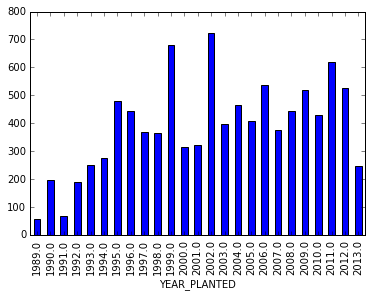

In [45]:
trees.groupby('YEAR_PLANTED').size().plot(kind='bar')

Notice that the dates are floats. For the sake of presentation, we can format the index of the series so that the dates are integers and the label is `Year Planted`.

In [56]:
dates = list(range(1989,2014))
print(dates)

[1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


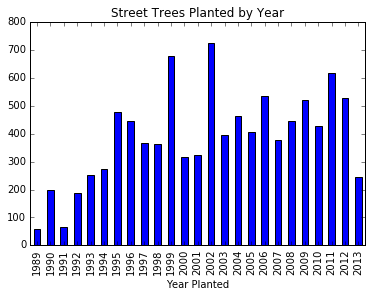

In [58]:
planted = trees.groupby('YEAR_PLANTED').size()
planted.index = dates
planted.index.name = 'Year Planted'
planted.plot(kind='bar',title='Street Trees Planted by Year')

## 3. More plots

**EXAMPLE 1.** Plot the number of trees in each neighbourhood.

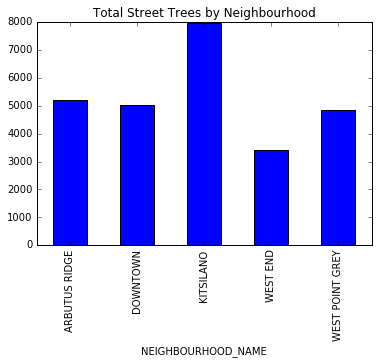

In [62]:
trees.groupby('NEIGHBOURHOOD_NAME').size().plot(kind='bar',title='Total Street Trees by Neighbourhood')

**EXAMPLE 2.** How many different trees (by common name) are there in the dataset? What are the ten most common trees and how many are there?

In [67]:
trees['COMMON_NAME'].unique().size

428

In [72]:
top_ten_trees = trees.groupby('COMMON_NAME').size().sort_values(ascending=False).head(10)
print(top_ten_trees)

COMMON_NAME
PISSARD PLUM                   1633
NORWAY MAPLE                   1511
KWANZAN FLOWERING CHERRY       1438
CRIMEAN LINDEN                  841
RED MAPLE                       826
COMMON HORSECHESTNUT            653
KOBUS MAGNOLIA                  544
EUROPEAN BEECH                  533
PYRAMIDAL EUROPEAN HORNBEAM     502
BOWHALL RED MAPLE               448
dtype: int64


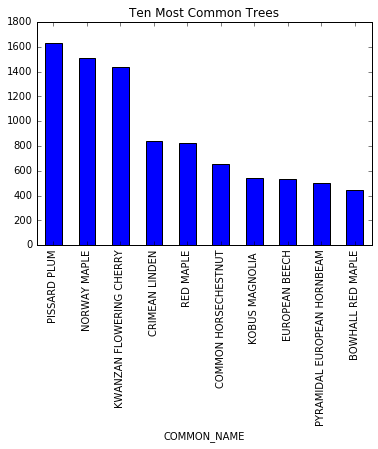

In [73]:
top_ten_trees.plot(kind='bar',title='Ten Most Common Trees')

**EXAMPLE 3.** What were the 10 most common trees planted in 2013?

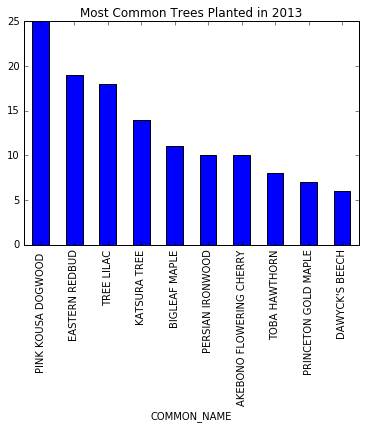

In [76]:
top_ten_2013 = trees[trees['YEAR_PLANTED'] == 2013].groupby('COMMON_NAME').size().sort_values(ascending=False).head(10)
top_ten_2013.plot(kind='bar',title='Most Common Trees Planted in 2013')